In [20]:
import pandas as pd
from word2vec_transformers import conceptcluster, tokenizer
from sklearn.cluster import KMeans


from datetime import timezone, datetime
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import make_pipeline, make_union
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import FunctionTransformer
import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../Data/wsb_full_not_deleted_withdt.csv")


C:\Users\lnajt\anaconda3\envs\Erdos_Institute\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (45,88,117,118,119,122,123,124,125) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
tokenizer().in_place(X = df, cols = ['title', 'selftext'])

# this replaces:
#df['tokenized_title'] = tokenizer().fit_transform(df.title)
#df['tokenized_selftext'] = tokenizer().fit_transform(df.selftext)

In [4]:
cc = conceptcluster(method = "KMeans")
#cc.clusteringmodel = KMeans(n_clusters= 100,verbose= True ) #can also be set like this

cc.roughclustersize = 150
cc.verbose = True

In [5]:
cc.fit(X = df)

Initialization complete
Iteration 0, inertia 289633.40625
Iteration 1, inertia 246951.75
Iteration 2, inertia 240896.390625
Iteration 3, inertia 238558.984375
Iteration 4, inertia 237178.6875
Iteration 5, inertia 236252.359375
Iteration 6, inertia 235684.25
Iteration 7, inertia 235352.1875
Iteration 8, inertia 235137.78125
Iteration 9, inertia 235000.546875
Iteration 10, inertia 234881.9375
Iteration 11, inertia 234810.234375
Iteration 12, inertia 234742.421875
Iteration 13, inertia 234641.09375
Iteration 14, inertia 234556.296875
Iteration 15, inertia 234507.09375
Iteration 16, inertia 234470.796875
Iteration 17, inertia 234454.546875
Iteration 18, inertia 234445.8125
Iteration 19, inertia 234437.734375
Iteration 20, inertia 234428.6875
Iteration 21, inertia 234415.78125
Iteration 22, inertia 234410.0
Iteration 23, inertia 234403.703125
Iteration 24, inertia 234398.984375
Iteration 25, inertia 234394.21875
Iteration 26, inertia 234388.75
Iteration 27, inertia 234380.3125
Iteration 28,

Iteration 6, inertia 237513.921875
Iteration 7, inertia 237033.53125
Iteration 8, inertia 236618.4375
Iteration 9, inertia 236207.296875
Iteration 10, inertia 235871.640625
Iteration 11, inertia 235458.1875
Iteration 12, inertia 235177.1875
Iteration 13, inertia 234985.078125
Iteration 14, inertia 234917.5
Iteration 15, inertia 234874.15625
Iteration 16, inertia 234832.34375
Iteration 17, inertia 234799.140625
Iteration 18, inertia 234763.09375
Iteration 19, inertia 234741.890625
Iteration 20, inertia 234733.640625
Iteration 21, inertia 234721.734375
Iteration 22, inertia 234715.234375
Iteration 23, inertia 234707.609375
Iteration 24, inertia 234706.125
Iteration 25, inertia 234705.9375
Iteration 26, inertia 234704.546875
Iteration 27, inertia 234703.4375
Iteration 28, inertia 234702.421875
Iteration 29, inertia 234701.734375
Iteration 30, inertia 234701.46875
Iteration 31, inertia 234700.6875
Iteration 32, inertia 234700.8125
Iteration 33, inertia 234700.8125
Iteration 34, inertia 234

Iteration 13, inertia 235699.34375
Iteration 14, inertia 235645.78125
Iteration 15, inertia 235592.59375
Iteration 16, inertia 235547.796875
Iteration 17, inertia 235490.0
Iteration 18, inertia 235427.578125
Iteration 19, inertia 235365.0625
Iteration 20, inertia 235324.71875
Iteration 21, inertia 235264.8125
Iteration 22, inertia 235228.09375
Iteration 23, inertia 235214.59375
Iteration 24, inertia 235188.828125
Iteration 25, inertia 235121.40625
Iteration 26, inertia 235046.71875
Iteration 27, inertia 234998.609375
Iteration 28, inertia 234966.859375
Iteration 29, inertia 234949.640625
Iteration 30, inertia 234940.34375
Iteration 31, inertia 234928.53125
Iteration 32, inertia 234920.078125
Iteration 33, inertia 234907.046875
Iteration 34, inertia 234896.28125
Iteration 35, inertia 234894.71875
Iteration 36, inertia 234895.265625
Iteration 37, inertia 234894.890625
Iteration 38, inertia 234894.21875
Iteration 39, inertia 234893.078125
Iteration 40, inertia 234892.890625
Iteration 41, 

conceptcluster(rough_cluster_size=150)

In [6]:
concept_features = cc.transform(X = df)

In [15]:
merged = df[['ups']].merge(concept_features, left_index = True, right_index = True)

In [8]:
cc.cluster_of_word("immediately")

['on',
 'up',
 'into',
 'back',
 'then',
 'before',
 'off',
 'around',
 'through',
 'again',
 'until',
 'away',
 'finally',
 'till',
 'panic',
 'eventually',
 'immediately']

In [9]:
cc.cluster_of_word("stocks")

['stock', 'stocks']

In [10]:
cc.cluster_of_word("tendies")

['money', 'tendies', 'life', 'portfolio', 'savings']

In [12]:
cc.cluster_of_word("monies") # Here's a big cluster...

['full',
 'instead',
 'along',
 'inside',
 'self',
 'everyday',
 'magic',
 'tiny',
 'winners',
 'earned',
 'loses',
 'grand',
 'trash',
 'losers',
 'button',
 'stops',
 'club',
 'tip',
 'billionaires',
 'yolos',
 'charity',
 'ourselves',
 'prepare',
 'ultimate',
 'gainz',
 'crap',
 'juicy',
 'forth',
 'tickets',
 'pieces',
 'yours',
 'rope',
 'portfolios',
 'guh',
 'trick',
 'child',
 'scheme',
 'hurts',
 'logo',
 'greed',
 'scam',
 'edition',
 'becky',
 'godspeed',
 'ppl',
 'wheel',
 'color',
 'roth',
 'gift',
 'enjoyed',
 'boss',
 'glorious',
 'pizza',
 'lil',
 'loved',
 'morons',
 'pumps',
 'millionaire',
 'bang',
 'politicians',
 'cheers',
 'doctor',
 'sleeping',
 'ugly',
 'printers',
 'chasing',
 'faces',
 'dogs',
 'hero',
 'dreams',
 'pocket',
 'bro',
 'smoke',
 'guns',
 'shame',
 'og',
 'sir',
 'crack',
 'backs',
 'coke',
 'bread',
 'minds',
 'span',
 'universe',
 'piss',
 'stars',
 'noise',
 'nerds',
 'evil',
 'pennies',
 'mouse',
 'stimmy',
 'loser',
 'bagholders',
 'emotions'

In [32]:
def run_experiment(model, df):
    X = df.drop(columns = ['ups'])
    y = df.ups

    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0)

    print("working on", model)

    pipe = make_pipeline(conceptcluster(verbose = True), model, verbose = True)
    pipe.fit(X_train, y_train)


    sns.scatterplot(x = pipe.predict(X_test), y = y_test)
    plt.show()
    sns.scatterplot(x = pipe.predict(X_train), y = y_train)
    plt.show()
    
    scores = cross_val_score(pipe,X,y)
    print(scores)

    
#for model in [LinearRegression(), xgb.XGBRegressor(random_state=2)]:
#    run_experiment(model, df)


working on LinearRegression()
Initialization complete
Iteration 0, inertia 228621.296875
Iteration 1, inertia 195842.890625
Iteration 2, inertia 190654.140625
Iteration 3, inertia 188816.71875
Iteration 4, inertia 187665.9375
Iteration 5, inertia 186969.015625
Iteration 6, inertia 186511.296875
Iteration 7, inertia 186124.53125
Iteration 8, inertia 185781.3125
Iteration 9, inertia 185547.90625
Iteration 10, inertia 185440.03125
Iteration 11, inertia 185390.765625
Iteration 12, inertia 185357.890625
Iteration 13, inertia 185329.515625
Iteration 14, inertia 185283.390625
Iteration 15, inertia 185255.453125
Iteration 16, inertia 185231.40625
Iteration 17, inertia 185202.375
Iteration 18, inertia 185182.375
Iteration 19, inertia 185165.46875
Iteration 20, inertia 185147.1875
Iteration 21, inertia 185124.859375
Iteration 22, inertia 185118.09375
Iteration 23, inertia 185111.90625
Iteration 24, inertia 185107.25
Iteration 25, inertia 185098.71875
Iteration 26, inertia 185094.640625
Iteration

Iteration 58, inertia 185441.234375
Iteration 59, inertia 185438.984375
Iteration 60, inertia 185437.375
Iteration 61, inertia 185436.09375
Iteration 62, inertia 185435.15625
Iteration 63, inertia 185434.65625
Iteration 64, inertia 185433.625
Iteration 65, inertia 185433.96875
Iteration 66, inertia 185432.3125
Iteration 67, inertia 185430.953125
Iteration 68, inertia 185428.53125
Iteration 69, inertia 185426.671875
Iteration 70, inertia 185423.46875
Iteration 71, inertia 185420.78125
Iteration 72, inertia 185420.4375
Iteration 73, inertia 185420.3125
Iteration 74, inertia 185420.359375
Converged at iteration 74: center shift 1.6849574535626743e-07 within tolerance 5.439207702875137e-06.
Initialization complete
Iteration 0, inertia 227385.359375
Iteration 1, inertia 196309.796875
Iteration 2, inertia 191550.9375
Iteration 3, inertia 189567.25
Iteration 4, inertia 188475.71875
Iteration 5, inertia 187638.40625
Iteration 6, inertia 187091.875
Iteration 7, inertia 186736.65625
Iteration 8,

Initialization complete
Iteration 0, inertia 227320.96875
Iteration 1, inertia 195733.265625
Iteration 2, inertia 190849.0625
Iteration 3, inertia 189041.734375
Iteration 4, inertia 187899.84375
Iteration 5, inertia 187192.234375
Iteration 6, inertia 186730.984375
Iteration 7, inertia 186426.0
Iteration 8, inertia 186223.203125
Iteration 9, inertia 186058.953125
Iteration 10, inertia 185933.390625
Iteration 11, inertia 185826.53125
Iteration 12, inertia 185735.125
Iteration 13, inertia 185654.078125
Iteration 14, inertia 185596.015625
Iteration 15, inertia 185568.421875
Iteration 16, inertia 185524.3125
Iteration 17, inertia 185483.4375
Iteration 18, inertia 185443.03125
Iteration 19, inertia 185418.921875
Iteration 20, inertia 185385.40625
Iteration 21, inertia 185364.578125
Iteration 22, inertia 185342.84375
Iteration 23, inertia 185311.546875
Iteration 24, inertia 185274.015625
Iteration 25, inertia 185252.15625
Iteration 26, inertia 185234.375
Iteration 27, inertia 185220.875
Itera

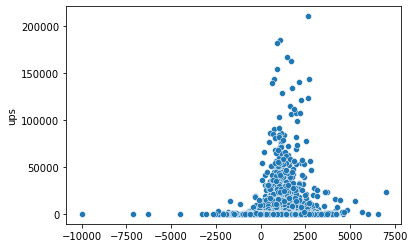

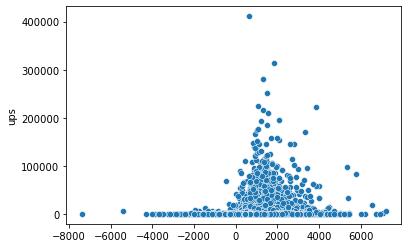

Initialization complete
Iteration 0, inertia 225235.359375
Iteration 1, inertia 193732.546875
Iteration 2, inertia 188665.03125
Iteration 3, inertia 186893.109375
Iteration 4, inertia 185991.203125
Iteration 5, inertia 185475.5625
Iteration 6, inertia 185114.265625
Iteration 7, inertia 184810.890625
Iteration 8, inertia 184413.171875
Iteration 9, inertia 184191.703125
Iteration 10, inertia 184002.953125
Iteration 11, inertia 183865.578125
Iteration 12, inertia 183760.921875
Iteration 13, inertia 183689.578125
Iteration 14, inertia 183629.265625
Iteration 15, inertia 183555.203125
Iteration 16, inertia 183479.171875
Iteration 17, inertia 183419.96875
Iteration 18, inertia 183382.484375
Iteration 19, inertia 183356.578125
Iteration 20, inertia 183316.34375
Iteration 21, inertia 183294.671875
Iteration 22, inertia 183267.203125
Iteration 23, inertia 183238.984375
Iteration 24, inertia 183225.953125
Iteration 25, inertia 183216.484375
Iteration 26, inertia 183205.953125
Iteration 27, inert

Initialization complete
Iteration 0, inertia 225080.671875
Iteration 1, inertia 193513.84375
Iteration 2, inertia 188749.46875
Iteration 3, inertia 186837.03125
Iteration 4, inertia 185904.71875
Iteration 5, inertia 185312.625
Iteration 6, inertia 184940.796875
Iteration 7, inertia 184675.484375
Iteration 8, inertia 184385.3125
Iteration 9, inertia 184164.890625
Iteration 10, inertia 183915.46875
Iteration 11, inertia 183777.828125
Iteration 12, inertia 183673.40625
Iteration 13, inertia 183605.765625
Iteration 14, inertia 183517.96875
Iteration 15, inertia 183417.828125
Iteration 16, inertia 183370.515625
Iteration 17, inertia 183359.203125
Iteration 18, inertia 183351.21875
Iteration 19, inertia 183346.140625
Iteration 20, inertia 183337.9375
Iteration 21, inertia 183325.703125
Iteration 22, inertia 183311.21875
Iteration 23, inertia 183299.84375
Iteration 24, inertia 183291.625
Iteration 25, inertia 183279.765625
Iteration 26, inertia 183267.46875
Iteration 27, inertia 183255.796875

Iteration 14, inertia 185681.953125
Iteration 15, inertia 185654.15625
Iteration 16, inertia 185630.4375
Iteration 17, inertia 185609.1875
Iteration 18, inertia 185591.5625
Iteration 19, inertia 185577.078125
Iteration 20, inertia 185570.3125
Iteration 21, inertia 185562.5
Iteration 22, inertia 185549.546875
Iteration 23, inertia 185543.84375
Iteration 24, inertia 185539.921875
Iteration 25, inertia 185536.890625
Iteration 26, inertia 185533.328125
Iteration 27, inertia 185531.078125
Iteration 28, inertia 185527.78125
Iteration 29, inertia 185524.203125
Iteration 30, inertia 185519.28125
Iteration 31, inertia 185507.5625
Iteration 32, inertia 185494.21875
Iteration 33, inertia 185475.125
Iteration 34, inertia 185454.984375
Iteration 35, inertia 185438.109375
Iteration 36, inertia 185409.71875
Iteration 37, inertia 185394.015625
Iteration 38, inertia 185381.859375
Iteration 39, inertia 185370.703125
Iteration 40, inertia 185355.90625
Iteration 41, inertia 185351.8125
Iteration 42, inert

Initialization complete
Iteration 0, inertia 224391.296875
Iteration 1, inertia 192427.9375
Iteration 2, inertia 187867.46875
Iteration 3, inertia 186417.03125
Iteration 4, inertia 185745.609375
Iteration 5, inertia 185242.6875
Iteration 6, inertia 184846.890625
Iteration 7, inertia 184459.1875
Iteration 8, inertia 184265.890625
Iteration 9, inertia 184114.40625
Iteration 10, inertia 183975.25
Iteration 11, inertia 183885.9375
Iteration 12, inertia 183831.328125
Iteration 13, inertia 183770.734375
Iteration 14, inertia 183724.546875
Iteration 15, inertia 183671.0
Iteration 16, inertia 183637.28125
Iteration 17, inertia 183609.390625
Iteration 18, inertia 183590.3125
Iteration 19, inertia 183571.671875
Iteration 20, inertia 183554.0
Iteration 21, inertia 183523.296875
Iteration 22, inertia 183494.1875
Iteration 23, inertia 183453.671875
Iteration 24, inertia 183415.859375
Iteration 25, inertia 183390.0
Iteration 26, inertia 183377.28125
Iteration 27, inertia 183367.5
Iteration 28, inert

Iteration 17, inertia 182546.96875
Iteration 18, inertia 182535.0
Iteration 19, inertia 182523.796875
Iteration 20, inertia 182508.953125
Iteration 21, inertia 182489.828125
Iteration 22, inertia 182468.515625
Iteration 23, inertia 182449.09375
Iteration 24, inertia 182427.328125
Iteration 25, inertia 182412.75
Iteration 26, inertia 182400.484375
Iteration 27, inertia 182386.125
Iteration 28, inertia 182370.734375
Iteration 29, inertia 182358.03125
Iteration 30, inertia 182333.046875
Iteration 31, inertia 182327.296875
Iteration 32, inertia 182320.25
Iteration 33, inertia 182305.703125
Iteration 34, inertia 182290.421875
Iteration 35, inertia 182263.8125
Iteration 36, inertia 182248.78125
Iteration 37, inertia 182230.265625
Iteration 38, inertia 182217.6875
Iteration 39, inertia 182207.921875
Iteration 40, inertia 182193.546875
Iteration 41, inertia 182174.28125
Iteration 42, inertia 182157.125
Iteration 43, inertia 182135.359375
Iteration 44, inertia 182120.28125
Iteration 45, inertia

Iteration 20, inertia 199865.1875
Iteration 21, inertia 199847.125
Iteration 22, inertia 199826.296875
Iteration 23, inertia 199807.515625
Iteration 24, inertia 199785.6875
Iteration 25, inertia 199758.90625
Iteration 26, inertia 199733.109375
Iteration 27, inertia 199710.0625
Iteration 28, inertia 199687.6875
Iteration 29, inertia 199670.453125
Iteration 30, inertia 199656.21875
Iteration 31, inertia 199644.296875
Iteration 32, inertia 199635.71875
Iteration 33, inertia 199627.125
Iteration 34, inertia 199619.4375
Iteration 35, inertia 199610.578125
Iteration 36, inertia 199607.609375
Iteration 37, inertia 199602.671875
Iteration 38, inertia 199591.375
Iteration 39, inertia 199576.203125
Iteration 40, inertia 199566.140625
Iteration 41, inertia 199558.265625
Iteration 42, inertia 199547.546875
Iteration 43, inertia 199541.671875
Iteration 44, inertia 199536.84375
Iteration 45, inertia 199531.375
Iteration 46, inertia 199526.28125
Iteration 47, inertia 199520.921875
Iteration 48, inert

Converged at iteration 41: center shift 2.1302416826074477e-06 within tolerance 5.623943358659744e-06.
Initialization complete
Iteration 0, inertia 243654.15625
Iteration 1, inertia 210688.453125
Iteration 2, inertia 205382.46875
Iteration 3, inertia 203136.03125
Iteration 4, inertia 202156.546875
Iteration 5, inertia 201346.25
Iteration 6, inertia 200728.796875
Iteration 7, inertia 200302.828125
Iteration 8, inertia 199956.890625
Iteration 9, inertia 199743.703125
Iteration 10, inertia 199595.96875
Iteration 11, inertia 199462.390625
Iteration 12, inertia 199341.65625
Iteration 13, inertia 199211.078125
Iteration 14, inertia 199126.328125
Iteration 15, inertia 199059.421875
Iteration 16, inertia 198992.515625
Iteration 17, inertia 198953.5625
Iteration 18, inertia 198922.09375
Iteration 19, inertia 198890.78125
Iteration 20, inertia 198854.484375
Iteration 21, inertia 198830.828125
Iteration 22, inertia 198783.953125
Iteration 23, inertia 198749.359375
Iteration 24, inertia 198724.968

Iteration 37, inertia 199380.484375
Iteration 38, inertia 199379.96875
Iteration 39, inertia 199379.59375
Iteration 40, inertia 199379.375
Iteration 41, inertia 199379.171875
Iteration 42, inertia 199379.640625
Converged at iteration 42: center shift 2.1369248770497506e-06 within tolerance 5.623943358659744e-06.
[Pipeline] ... (step 1 of 2) Processing conceptcluster, total=596.1min
[Pipeline] .. (step 2 of 2) Processing linearregression, total=   4.0s
Initialization complete
Iteration 0, inertia 268636.78125
Iteration 1, inertia 228574.390625
Iteration 2, inertia 223268.28125
Iteration 3, inertia 221572.15625
Iteration 4, inertia 220684.3125
Iteration 5, inertia 220192.40625
Iteration 6, inertia 219819.28125
Iteration 7, inertia 219582.328125
Iteration 8, inertia 219451.234375
Iteration 9, inertia 219327.75
Iteration 10, inertia 219242.375
Iteration 11, inertia 219176.203125
Iteration 12, inertia 219092.421875
Iteration 13, inertia 219015.34375
Iteration 14, inertia 218924.09375
Iterat

Iteration 40, inertia 219545.796875
Iteration 41, inertia 219539.765625
Iteration 42, inertia 219531.140625
Iteration 43, inertia 219525.296875
Iteration 44, inertia 219513.578125
Iteration 45, inertia 219496.890625
Iteration 46, inertia 219487.59375
Iteration 47, inertia 219483.015625
Iteration 48, inertia 219472.71875
Iteration 49, inertia 219471.703125
Iteration 50, inertia 219470.984375
Iteration 51, inertia 219471.1875
Iteration 52, inertia 219471.53125
Iteration 53, inertia 219471.4375
Iteration 54, inertia 219470.953125
Iteration 55, inertia 219470.59375
Converged at iteration 55: center shift 3.075435870414367e-06 within tolerance 5.858885496854782e-06.
Initialization complete
Iteration 0, inertia 269263.09375
Iteration 1, inertia 230382.6875
Iteration 2, inertia 224770.0625
Iteration 3, inertia 222668.703125
Iteration 4, inertia 221554.0
Iteration 5, inertia 220890.234375
Iteration 6, inertia 220533.84375
Iteration 7, inertia 220328.984375
Iteration 8, inertia 220196.265625
It

In [ ]:
X = df.drop(columns = ['ups'])
y = df.ups

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                random_state=0)

print("working on", model)

pipe = make_pipeline(conceptcluster(verbose = True), LinearRegression(), verbose = True)
pipe.fit(X_train, y_train)


sns.scatterplot(x = pipe.predict(X_test), y = y_test)
plt.show()
sns.scatterplot(x = pipe.predict(X_train), y = y_train)
plt.show()

scores = cross_val_score(pipe,X,y)
print(scores)
